In [36]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1765045085943.jpg,0.290725,0.799272,0.981452,0.315547,0.843264
1,Dataset/1765045108992.jpg,0.701061,0.821316,0.014293,0.520661,0.749696
2,Dataset/1755731846217.jpg,0.843060,0.779494,0.697019,0.072201,0.722212
3,Dataset/1765045151300.jpg,0.269715,0.403834,0.986964,0.466890,0.720015
4,Dataset/1765045146918.jpg,0.315907,0.733939,0.225634,0.024503,0.715156
...,...,...,...,...,...,...
6961,Dataset/1755881774477.jpg,0.117913,0.158991,0.114478,0.158932,0.003435
6962,Dataset/1755731279309.jpg,0.934449,0.592894,0.934261,0.589894,0.003006
6963,Dataset/1755777806375.jpg,0.092722,0.897337,0.095418,0.896317,0.002882
6964,Dataset/1764944034509.jpg,0.673009,0.439272,0.673322,0.437579,0.001721


In [37]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

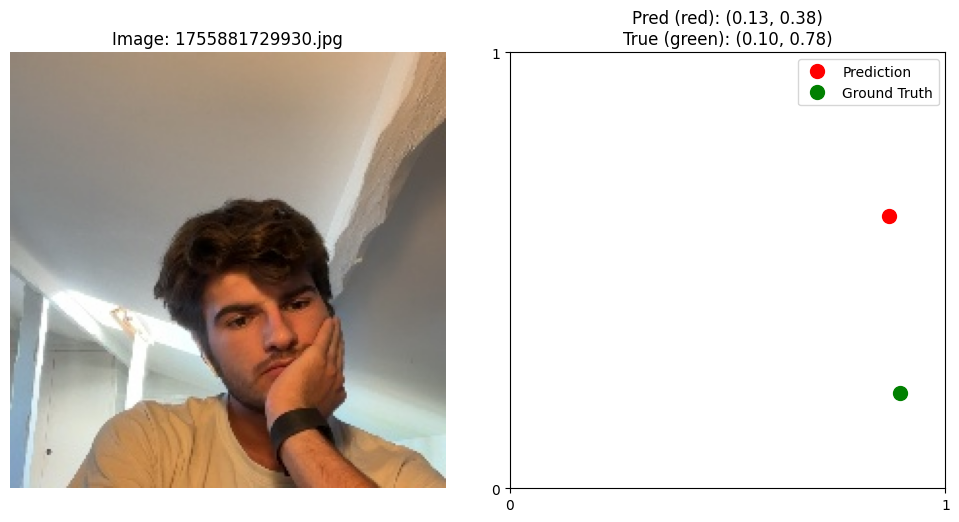

In [38]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [39]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1765045085943.jpg', 'Dataset/1765045108992.jpg', 'Dataset/1765045146918.jpg', 'Dataset/1765045085174.jpg', 'Dataset/1765045146658.jpg', 'Dataset/1765045086197.jpg', 'Dataset/1757528220601.jpg', 'Dataset/1765045090272.jpg', 'Dataset/1765045108479.jpg', 'Dataset/1765045109250.jpg', 'Dataset/1755730156143.jpg', 'Dataset/1755898196816.jpg', 'Dataset/1765029913469.jpg', 'Dataset/1765029872994.jpg', 'Dataset/1765045141037.jpg', 'Dataset/1765044363888.jpg', 'Dataset/1765045086957.jpg', 'Dataset/1755881702537.jpg', 'Dataset/1765045084154.jpg', 'Dataset/1755731853893.jpg', 'Dataset/1765045104385.jpg', 'Dataset/1765044390268.jpg', 'Dataset/1755730506741.jpg', 'Dataset/1755730536719.jpg', 'Dataset/1755777825604.jpg', 'Dataset/1755731290602.jpg', 'Dataset/1755777753959.jpg', 'Dataset/1755731873859.jpg', 'Dataset/1755730156663.jpg', 'Dataset/1755730935310.jpg', 'Dataset/1755881702796.jpg', 'Dataset/1755730935561.jpg', 'Dataset/1765044433043.jpg', 'Dataset/1755731249377.jp

In [40]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 6943
Length of filtered_dataset_df 6899
